In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load libraries
import pandas as pd
import numpy as np
from google.colab import files
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow
tensorflow.random.set_seed(0)
from numpy.random import seed
seed(1)

In [4]:
# Load training data
train_data = pd.read_csv('gdrive/MyDrive/train_internet.csv')
len(train_data)

965

In [5]:
train_data.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",16,196058.0,129639.0,436.0,1806.0,202038.0,2,264496,280429.0,144.0,10,2332.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348022.0,NaN,NaN,NaN,NaN,NaN,333495,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",16,196058.0,129639.0,10314.0,1817.0,202038.0,2,264496,136127.0,144.0,10,3201.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348024.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504160,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4144.0,6384,1.620000e+12,2,1.0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",16,196058.0,129639.0,0.0,1812.0,202038.0,2,264503,172725.0,144.0,10,2821.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348027.0,NaN,NaN,NaN,NaN,NaN,128491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",16,196058.0,129639.0,10300.0,1815.0,202038.0,2,264496,136127.0,144.0,10,3144.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348023.0,NaN,NaN,NaN,NaN,NaN,"232,809,333,496",348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1.0,1,NaN,3296,NaN,3370,1.620000e+12,2,1.0,"761,75y",17,129311.0,129408.0,0.0,1818.0,0.0,2,264496,136127.0,144.0,10,42597.0,1.620000e+12,1.620000e+12,360833.0,1.0,348011.0,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [6]:
# Load testing data
test_data = pd.read_csv('gdrive/MyDrive/test_internet.csv')
len(test_data)

455

In [7]:
test_data.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,XXX.XXX.XXX.XXX,5526656,53184285,3,2658,https%3A%2F%2Ftimesofindia.indiatimes.com%2Fworld,3,2946.0,8628,1620000000000,1,1,"9nj,8qu",16,196061,0,0,2442,0,1,264494,265618,145,10,369206,1620000000000,NaN,0,1,348012,NaN,196047.0,NaN,42860785.0,1.0,NaN,NaN,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.1,144,XXX.XXX.XXX.XXX,5488773,49504162,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy5,oy7,mgg,oy9,pus,lo4,p12,ps3,oos,p16,oou,o1...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,2298,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.1,144,XXX.XXX.XXX.XXX,5488088,49504161,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy7,mgg,oy9,lo4,p12,ps3,oos,p16,oou,o1v,p18,5o...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,5713,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,66670,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,53789,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN


In [8]:
# Get the number of missing data points per column
missing_values_count_train = train_data.isnull().sum()
print(missing_values_count_train)

clientid_cr                        0
clmbuserid_cr                      0
conversiontime_cr                  0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                           20
audiences_cr                     199
clickbid_cr                      296
geodimid_cr                        0
ip_cr                             20
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                       20
pubclientid_cr                     0
refurl_cr                        125
siteId_cr                          0
templateid_cr                    107
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               1
allAudiences_cr                   47
pricingtype_cr                     0
osId_cr                           21
browserId_cr                      21
cityId_cr                         20
stateId_cr                        20
m

In [9]:
# Get the number of missing data points per column
missing_values_count_test = test_data.isnull().sum()
print(missing_values_count_test)

record_id                          0
clientid_cr                        0
clmbuserid_cr                      0
conversiontime_cr                  0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                            0
audiences_cr                      86
clickbid_cr                      150
geodimid_cr                        0
ip_cr                              0
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                        0
pubclientid_cr                     0
refurl_cr                         47
siteId_cr                          0
templateid_cr                     41
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               0
allAudiences_cr                   23
pricingtype_cr                     0
osId_cr                            0
browserId_cr                       0
cityId_cr                          0
s

In [21]:
# Plot statistics
#print('clientid_cr: ', len(train_data['clientid_cr'].unique()))
#print('adslotdimid_cr: ', len(train_data['adslotdimid_cr'].unique()))
#print('algo_cr: ', len(train_data['algo_cr'].unique()))
#print('clickbid_cr: ', len(train_data['clickbid_cr'].unique()))
#print('geodimid_cr: ', len(train_data['geodimid_cr'].unique()))
#print('ip_cr: ', len(train_data['ip_cr'].unique()))
#print('itemcolumbiaid_cr: ', len(train_data['itemcolumbiaid_cr'].unique()))
#print('itemid_cr: ', len(train_data['itemid_cr'].unique()))
#print('position_cr: ', len(train_data['position_cr'].unique()))
#print('pubclientid_cr: ', len(train_data['pubclientid_cr'].unique()))
#print('siteId_cr: ', len(train_data['siteId_cr'].unique()))
#print('templateid_cr: ', len(train_data['templateid_cr'].unique()))
#print('goalid_cr: ', len(train_data['goalid_cr'].unique()))
#print('adLogType_cr: ', len(train_data['adLogType_cr'].unique()))
#print('v_cr: ', len(train_data['v_cr'].unique()))
#print('pricingtype_cr: ', len(train_data['pricingtype_cr'].unique()))
#print('osId_cr: ', len(train_data['osId_cr'].unique()))
#print('browserId_cr: ', len(train_data['browserId_cr'].unique()))
#print('cityId_cr: ', len(train_data['cityId_cr'].unique()))
#print('stateId_cr: ', len(train_data['stateId_cr'].unique()))
#print('modelDimId_cr: ', len(train_data['modelDimId_cr'].unique()))
#print('lookUpFrom_cr: ', len(train_data['lookUpFrom_cr'].unique()))
#print('connTypeDimId_cr: ', len(train_data['connTypeDimId_cr'].unique()))
#print('ispDimId_cr: ', len(train_data['ispDimId_cr'].unique()))
#print('countryDimId_cr: ', len(train_data['countryDimId_cr'].unique()))
#print('goalTypeId_cr: ', len(train_data['goalTypeId_cr'].unique()))
#print('impressionTimeInMillis_cr: ', len(train_data['impressionTimeInMillis_cr'].unique()))
#print('clickTimeInMillis_cr: ', len(train_data['clickTimeInMillis_cr'].unique()))
#print('osVerDimId_cr: ', len(train_data['osVerDimId_cr'].unique()))
#print('uuidSource_cr: ', len(train_data['uuidSource_cr'].unique()))
#print('geoGrpDimId_cr: ', len(train_data['geoGrpDimId_cr'].unique()))
#print('stateGrpDimId_cr: ', len(train_data['stateGrpDimId_cr'].unique()))
#print('cityGrpDimId_cr: ', len(train_data['cityGrpDimId_cr'].unique()))

countryDimId_cr:  10
goalTypeId_cr:  1
conversionDurationInMillis_cr:  925
impressionTimeInMillis_cr:  3
clickTimeInMillis_cr:  3
osVerDimId_cr:  33
uuidSource_cr:  7
geoGrpDimId_cr:  8
stateGrpDimId_cr:  9
cityGrpDimId_cr:  7


In [ ]:
train_imputed = train_data.fillna(method='bfill', axis=0).fillna(0)
train_imputed.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",16,196058.0,129639.0,436.0,1806.0,202038.0,2,264496,280429.0,144.0,10,2332.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348022.0,196047.0,0.0,42860785.0,1.0,aos:5.3.2,333495,348007.0,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",16,196058.0,129639.0,10314.0,1817.0,202038.0,2,264496,136127.0,144.0,10,3201.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348024.0,196047.0,0.0,42860785.0,1.0,aos:5.3.2,128491,348010.0,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504160,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4144.0,6384,1.620000e+12,2,1.0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",16,196058.0,129639.0,0.0,1812.0,202038.0,2,264503,172725.0,144.0,10,2821.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348027.0,196047.0,0.0,42860785.0,1.0,aos:5.3.2,128491,348007.0,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",16,196058.0,129639.0,10300.0,1815.0,202038.0,2,264496,136127.0,144.0,10,3144.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348023.0,196047.0,0.0,42860785.0,1.0,aos:5.3.2,"232,809,333,496",348007.0,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,5614054,53607445,1.0,1,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,3296,663.0,3370,1.620000e+12,2,1.0,"761,75y",17,129311.0,129408.0,0.0,1818.0,0.0,2,264496,136127.0,144.0,10,42597.0,1.620000e+12,1.620000e+12,360833.0,1.0,348011.0,348025.0,196047.0,0.0,42860785.0,1.0,aos:5.3.2,"333,495,128,491,333,000",348010.0,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True


In [ ]:
test_imputed = test_data.fillna(method='bfill', axis=0).fillna(0)
test_imputed.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,"8kv,2vk,8gw,2vl",3.1,145,XXX.XXX.XXX.XXX,5526656,53184285,3,2658,https%3A%2F%2Ftimesofindia.indiatimes.com%2Fworld,3,2946.0,8628,1620000000000,1,1,"9nj,8qu",16,196061,0,0,2442,0,1,264494,265618,145,10,369206,1620000000000,1.620000e+12,0,1,348012,348020.0,196047.0,0.0,42860785.0,1.0,aos:5.0.0,3.334953e+17,348006.0,3.337341e+17,128515.0,1.0,275.0,1.0,f92e484c-376d-48ff-8e29-813339eaf6c3-10nw4,True,52696020.0
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,"8kv,2vk,8gw,2vl",3.1,144,XXX.XXX.XXX.XXX,5488773,49504162,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy5,oy7,mgg,oy9,pus,lo4,p12,ps3,oos,p16,oou,o1...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,2298,1620000000000,1.620000e+12,199414,1,348011,348020.0,196047.0,0.0,42860785.0,1.0,aos:5.0.0,3.334953e+17,348006.0,3.337341e+17,128515.0,1.0,275.0,1.0,f92e484c-376d-48ff-8e29-813339eaf6c3-10nw4,True,52696020.0
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,"8kv,2vk,8gw,2vl",3.1,144,XXX.XXX.XXX.XXX,5488088,49504161,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy7,mgg,oy9,lo4,p12,ps3,oos,p16,oou,o1v,p18,5o...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,5713,1620000000000,1.620000e+12,199414,1,348011,348020.0,196047.0,0.0,42860785.0,1.0,aos:5.0.0,3.334953e+17,348006.0,3.337341e+17,128515.0,1.0,275.0,1.0,f92e484c-376d-48ff-8e29-813339eaf6c3-10nw4,True,52696020.0
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,"8kv,2vk,8gw,2vl",3.1,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,3296,663.0,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,66670,1620000000000,1.620000e+12,360833,1,348011,348025.0,196047.0,0.0,42860785.0,1.0,aos:5.0.0,3.334953e+17,348010.0,3.337341e+17,128515.0,1.0,275.0,1.0,f92e484c-376d-48ff-8e29-813339eaf6c3-10nw4,True,52696020.0
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,"8kv,2vk,8gw,2vl",3.1,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,3296,663.0,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,53789,1620000000000,1.620000e+12,360833,1,348011,348025.0,196047.0,0.0,42860785.0,1.0,aos:5.0.0,3.334953e+17,348010.0,3.337341e+17,128515.0,1.0,275.0,1.0,f92e484c-376d-48ff-8e29-813339eaf6c3-10nw4,True,52696020.0


In [23]:
train_imputed = train_data.fillna(method='bfill', axis=0).fillna(0)
test_imputed = test_data.fillna(method='bfill', axis=0).fillna(0)
features_lab = ['clientid_cr', 'adslotdimid_cr', 'algo_cr', 'clickbid_cr', 'geodimid_cr', 'ip_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'position_cr',
                'pubclientid_cr', 'siteId_cr', 'templateid_cr', 'goalid_cr', 'adLogType_cr', 'v_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr',
                'cityId_cr', 'stateId_cr', 'modelDimId_cr', 'lookUpFrom_cr', 'connTypeDimId_cr', 'ispDimId_cr', 'countryDimId_cr', 'goalTypeId_cr',
                'impressionTimeInMillis_cr', 'clickTimeInMillis_cr',  'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr',
                'cityGrpDimId_cr']

label_encoder = LabelEncoder()
#y = train_imputed.pop('conversion_fraud')
records = test_imputed.pop('record_id')
y = train_imputed['conversion_fraud']
y = label_encoder.fit_transform(y)
#cur_feature = 'clientid_cr'
for cur_feature in features_lab:
  train_imputed[cur_feature] = label_encoder.fit_transform(train_imputed[cur_feature])
  #Set classes in test which don't exist in the encoder to -1
  test_imputed.loc[~test_imputed[cur_feature].isin(label_encoder.classes_),cur_feature] = -1    
  #Encode classes that exist in the encoder
  test_imputed.loc[test_imputed[cur_feature].isin(label_encoder.classes_),cur_feature] = label_encoder.transform(test_imputed[cur_feature][test_imputed[cur_feature].isin(label_encoder.classes_)])
train_imputed.head()
#train_imputed.columns

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,36,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,70,9,"8gw,o3b",20,0,0,3,31,1,4,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,8,53,24,1.620000e+12,1,0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",1,8,5,2,10,3,1,5,120,0,0,2332.0,1,1,2,0,0,2,196047.0,0.0,42860785.0,1.0,aos:5.3.2,333495,2,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True
1,36,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,4,9,"8kv,2vk,8gw,2vl",14,0,0,4,33,1,17,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,16,0,24,1.620000e+12,1,0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",1,8,5,50,20,3,1,5,8,0,0,3201.0,1,1,2,0,0,4,196047.0,0.0,42860785.0,1.0,aos:5.3.2,128491,5,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True
2,36,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,76,5,"8gw,o3b",14,0,0,3,35,1,4,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,8,54,24,1.620000e+12,1,0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",1,8,5,0,16,3,1,8,64,0,0,2821.0,1,1,2,0,0,7,196047.0,0.0,42860785.0,1.0,aos:5.3.2,128491,2,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True
3,36,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,70,9,"8gw,o3b",14,0,0,3,31,1,4,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,8,53,24,1.620000e+12,1,0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",1,8,5,44,18,3,1,5,8,0,0,3144.0,1,1,2,0,0,3,196047.0,0.0,42860785.0,1.0,aos:5.3.2,"232,809,333,496",2,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True
4,19,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,180,5,"8kv,2vk,8gw,2vl",14,0,0,89,103,1,0,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,76,0,14,1.620000e+12,1,0,"761,75y",2,2,1,0,21,0,1,5,8,0,0,42597.0,1,1,24,0,0,5,196047.0,0.0,42860785.0,1.0,aos:5.3.2,"333,495,128,491,333,000",5,"333,493,333,494,128,000",128527.0,1.0,275.0,1.0,e9582b16-025b-4164-8c35-e5403f0f4ea5-1sk7o,True,52696020.0,True


In [24]:
train_imputed = train_imputed[features_lab]
train_imputed.head()

,clientid_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,adLogType_cr,v_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,36,70,9,20,0,0,3,31,1,4,8,53,24,1,0,1,8,5,2,10,3,1,5,120,0,0,1,1,2,0,0,2,2
1,36,4,9,14,0,0,4,33,1,17,16,0,24,1,0,1,8,5,50,20,3,1,5,8,0,0,1,1,2,0,0,4,5
2,36,76,5,14,0,0,3,35,1,4,8,54,24,1,0,1,8,5,0,16,3,1,8,64,0,0,1,1,2,0,0,7,2
3,36,70,9,14,0,0,3,31,1,4,8,53,24,1,0,1,8,5,44,18,3,1,5,8,0,0,1,1,2,0,0,3,2
4,19,180,5,14,0,0,89,103,1,0,76,0,14,1,0,2,2,1,0,21,0,1,5,8,0,0,1,1,24,0,0,5,5


In [25]:
train_imputed = train_imputed.to_numpy()
print(train_imputed[0])

[ 36  70   9  20   0   0   3  31   1   4   8  53  24   1   0   1   8   5
   2  10   3   1   5 120   0   0   1   1   2   0   0   2   2]


In [26]:
test_imputed = test_imputed[features_lab]
test_imputed = test_imputed.to_numpy()
print(test_imputed[0])

[45. 39.  9. 37.  1.  0. 10. 91.  3.  6.  0. 30. 33.  0.  0.  1.  9.  0.
  0. 33.  0.  0. -1. 93.  1.  0.  1.  1.  0.  0.  1.  0.  1.]


In [27]:
#Train-test split
train_X, val_X, train_y, val_y = train_test_split(train_imputed,y,random_state=1,test_size=0.2)
print(train_X[0])

[ 11 180   5  14   0   0  41  50   1   0  76   0   0   1   0   2   2   0
   3  12   0   1   5   8   0   0   0   0   0   0   0   0   1]


In [57]:
model = keras.Sequential([
    layers.Dense(units=4, activation='relu', input_shape=[len(features_lab)]),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In [58]:
# Define callbacks
early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

In [59]:
model.compile(
    optimizer=Adam(learning_rate=0.01), 
    loss='binary_crossentropy',
)

In [60]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping, rlrop]
)

Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 3.6687 - val_loss: 0.5133
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4853 - val_loss: 0.4789
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4956 - val_loss: 0.4812
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4776 - val_loss: 0.4832
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4187 - val_loss: 0.4857
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4333 - val_loss: 0.4232
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4111 - val_loss: 0.4245
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4104 - val_loss: 0.4247
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4108 - val_loss: 0.4238
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4106 - val_loss: 0.4244
Epoch 11/50
25/25 [

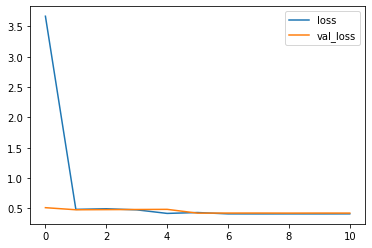

In [61]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [62]:
test_preds = model.predict(test_imputed)

In [63]:
test_preds = test_preds.flatten()

In [64]:
# The lines below shows how to save predictions in format used for competition scoring.
output = pd.DataFrame({'record_id': test_data.record_id,
                       'conversion_fraud': test_preds})

output.head()
output.to_csv('submission_internet.csv', index=False)
files.download('submission_internet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>